# **Evaluation & Results**

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
!rm -rf veinsecure-palm-vein-authentication
!git clone https://github.com/anjorisarabhai/veinsecure-palm-vein-authentication.git

Cloning into 'veinsecure-palm-vein-authentication'...
remote: Enumerating objects: 305, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 305 (delta 83), reused 31 (delta 22), pack-reused 137 (from 1)
Receiving objects: 100% (305/305), 11.53 MiB | 15.50 MiB/s, done.
Resolving deltas: 100% (115/115), done.


In [ ]:
import sys
sys.path.append('/content/veinsecure-palm-vein-authentication')

In [ ]:
!touch /content/veinsecure-palm-vein-authentication/utils/__init__.py

In [ ]:
!wget -O /content/veinsecure-palm-vein-authentication/utils/helpers.py https://raw.githubusercontent.com/anjorisarabhai/veinsecure-palm-vein-authentication/main/utils/helpers.py

--2025-06-18 17:08:30--  https://raw.githubusercontent.com/anjorisarabhai/veinsecure-palm-vein-authentication/main/utils/helpers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5203 (5.1K) [text/plain]
Saving to: ‘/content/veinsecure-palm-vein-authentication/utils/helpers.py’

/content/veinsecure 100%[===================>]   5.08K  --.-KB/s    in 0s      

2025-06-18 17:08:30 (74.3 MB/s) - ‘/content/veinsecure-palm-vein-authentication/utils/helpers.py’ saved [5203/5203]



In [ ]:
!ls -R /content/veinsecure-palm-vein-authentication

/content/veinsecure-palm-vein-authentication:
data   notebooks      README.md		results
model  preprocessing  requirements.txt	utils

/content/veinsecure-palm-vein-authentication/data:
README.md

/content/veinsecure-palm-vein-authentication/model:
evaluate_model.py  train_model.py

/content/veinsecure-palm-vein-authentication/notebooks:
evaluate_model.ipynb		    Palm_Vein_Preprocess.ipynb
palm_vein_baseline_cnn_model.ipynb  README.md
Palm_Vein_EDA.ipynb		    train_model.ipynb

/content/veinsecure-palm-vein-authentication/preprocessing:
palm_vein_preprocess.py  README.md

/content/veinsecure-palm-vein-authentication/results:
evaluation_summary.csv	logs  models  plots

/content/veinsecure-palm-vein-authentication/results/logs:
training_log.csv

/content/veinsecure-palm-vein-authentication/results/models:
final_model.h5

/content/veinsecure-palm-vein-authentication/results/plots:
confusion_matrix.png  learning_curves.png

/content/veinsecure-palm-vein-authentication/utils:
helpers.py  __in

In [ ]:
import os
print(os.listdir('/content/veinsecure-palm-vein-authentication/utils'))

['__init__.py', 'helpers.py']


In [ ]:
!ls /content/veinsecure-palm-vein-authentication/utils
!sed -n '1,20p' /content/veinsecure-palm-vein-authentication/utils/helpers.py

helpers.py  __init__.py
# -*- coding: utf-8 -*-
"""helpers.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1wZh4H_FGlBCgbYLvhelB5mwziKwCSpig
"""

import os

# Create the utils directory if it doesn't exist
os.makedirs('utils', exist_ok=True)

# Full helper code
helper_code = '''
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!head -n 127 /content/veinsecure-palm-vein-authentication/utils/helpers.py

# -*- coding: utf-8 -*-
"""helpers.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1wZh4H_FGlBCgbYLvhelB5mwziKwCSpig
"""

import os

# Create the utils directory if it doesn't exist
os.makedirs('utils', exist_ok=True)

# Full helper code
helper_code = '''
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

def load_processed_images(data_dir, img_size=(128, 128)):
    X, y = [], []
    class_names = sorted(os.listdir(data_dir))

    for class_idx, class_name in enumerate(class_names):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for img_file in os.listdir(class_path):
                if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
          

In [ ]:
import importlib
import utils.helpers
importlib.reload(utils.helpers)

✅ helpers.py updated with loader, generators, pipelines, and batch visualization.


<module 'utils.helpers' from '/content/veinsecure-palm-vein-authentication/utils/helpers.py'>

In [ ]:
from utils.helpers import create_data_generators, load_processed_images

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving processed_dataset.zip to processed_dataset.zip


In [ ]:
import zipfile
import os

zip_path = "processed_dataset.zip"
extract_path = "processed_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted to:", extract_path)

Extracted to: processed_dataset


In [ ]:
!wget https://github.com/anjorisarabhai/veinsecure-palm-vein-authentication/raw/main/processed_dataset.zip
!unzip processed_dataset.zip

--2025-06-18 17:10:47--  https://github.com/anjorisarabhai/veinsecure-palm-vein-authentication/raw/main/processed_dataset.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-06-18 17:10:47 ERROR 404: Not Found.

Archive:  processed_dataset.zip
   creating: processed_dataset/003/
  inflating: processed_dataset/003/003_F_R_7.JPG  
  inflating: processed_dataset/003/003_S_R_11.JPG  
  inflating: processed_dataset/003/003_S_L_20.JPG  
  inflating: processed_dataset/003/003_F_R_4.JPG  
  inflating: processed_dataset/003/003_S_L_21.JPG  
  inflating: processed_dataset/003/003_S_R_16.JPG  
  inflating: processed_dataset/003/003_F_R_0.JPG  
  inflating: processed_dataset/003/003_S_L_25.JPG  
  inflating: processed_dataset/003/003_S_L_26.JPG  
  inflating: processed_dataset/003/003_S_L_24.JPG  
  inflating: processed_dataset/003/003_S_R_13.JPG  
  inflating: process

### **Load data & labels and Create generators**

In [ ]:
X, y, class_names = load_processed_images("processed_dataset")
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

_, _, test_gen = create_data_generators(X, y_encoded, batch_size=32, augment=False)

In [ ]:
!git lfs install

Git LFS initialized.


### **Load the trained model**

In [ ]:
model = load_model("veinsecure-palm-vein-authentication/results/models/final_model.h5")

### **Predict on test set**

In [ ]:
y_true = []
y_pred = []

for i in range(len(test_gen)):
    x_batch, y_batch = test_gen[i]
    y_true.extend(np.argmax(y_batch, axis=1))
    preds = model.predict(x_batch)
    y_pred.extend(np.argmax(preds, axis=1))
y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


### **Evaluation metrics**

In [ ]:
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

In [ ]:
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

Accuracy: 0.8842975206611571
Precision: 0.9034552845528456
Recall: 0.8780487804878049
F1 Score: 0.8788487934829398


### **Save summary to CSV**

In [ ]:
summary_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [acc, prec, rec, f1]
})

In [ ]:
os.makedirs("results", exist_ok=True)
summary_df.to_csv("results/evaluation_summary.csv", index=False)

### **Confusion matrix**

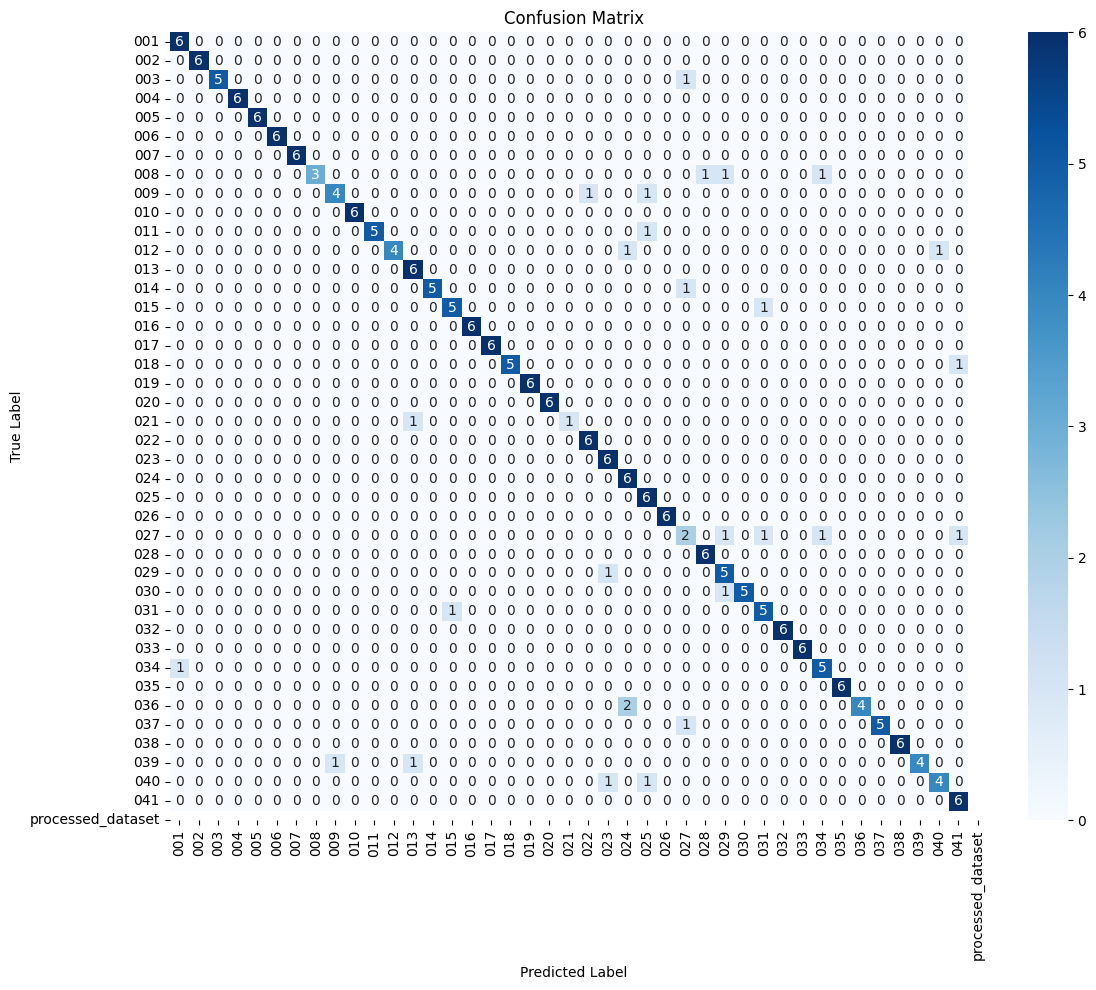

In [ ]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

os.makedirs("results/plots", exist_ok=True)
plt.savefig("results/plots/confusion_matrix.png")
plt.close()

In [ ]:
import shutil
shutil.make_archive("results", 'zip', "results")

FileNotFoundError: [Errno 2] No such file or directory: 'results'

### **Visualize sample predictions with true/pred labels**



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


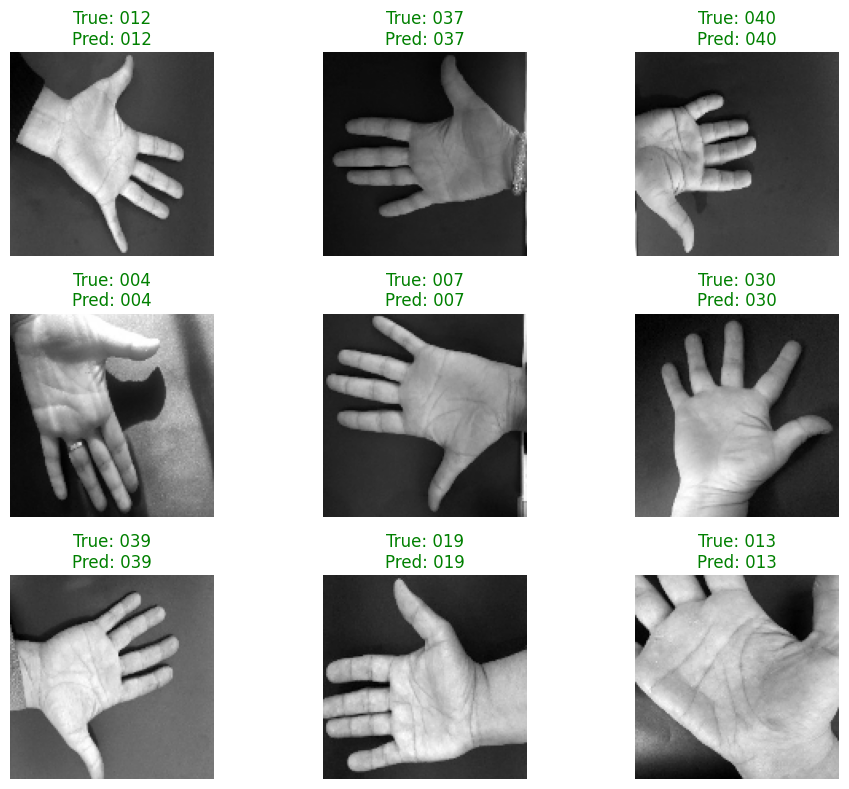

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model

# Get one batch of test data
test_images, test_labels = next(test_gen)  # assuming Keras ImageDataGenerator

# Predict
pred_probs = model.predict(test_images)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Plot first 9 predictions
plt.figure(figsize=(10, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_images[i].squeeze(), cmap='gray')
    plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[pred_labels[i]]}",
              color='green' if true_labels[i] == pred_labels[i] else 'red')
    plt.axis('off')
plt.tight_layout()
plt.show()

### **Analysis of misclassified samples**


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# Ensure arrays
class_names_np = np.array(class_names)
num_classes = len(class_names)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred, labels=range(num_classes))

# Misclassification Indices
wrong_idx = np.where(y_true != y_pred)[0]
total_test = len(y_true)
total_misclassified = len(wrong_idx)
mis_rate = total_misclassified / total_test * 100

# Misclassified Samples DataFrame
mis_df = pd.DataFrame({
    "Index": wrong_idx,
    "True Label": class_names_np[y_true][wrong_idx],
    "Predicted Label": class_names_np[y_pred][wrong_idx]
})
os.makedirs("results/day10", exist_ok=True)
mis_df.to_csv("results/day10/all_misclassified_samples.csv", index=False)

# Confused Pairs
conf_pairs = (mis_df.groupby(["True Label", "Predicted Label"])
                     .size()
                     .sort_values(ascending=False)
                     .head(5))

# Class-wise Accuracy
class_accuracies = {}
for i in range(num_classes):
    true_total = np.sum(conf_matrix[i])     # total actual for class i
    correct = conf_matrix[i][i]             # true positives
    acc = (correct / true_total * 100) if true_total > 0 else 0
    class_accuracies[class_names[i]] = round(acc, 2)

class_acc_df = pd.DataFrame(list(class_accuracies.items()), columns=["Class", "Accuracy (%)"])
class_acc_df.to_csv("results/day10/class_wise_accuracy.csv", index=False)

# Print Analysis
print("ANALYSIS OF MISCLASSIFIED SAMPLES\n")
print(f"Total test samples: {total_test}")
print(f"Total misclassified: {total_misclassified}")
print(f"Misclassification rate: {mis_rate:.2f}%\n")

print("TOP 5 MOST CONFUSED CLASS PAIRS:")
for (true_cls, pred_cls), count in conf_pairs.items():
    print(f" - {true_cls} → {pred_cls}: {count} times")

print("\n CLASS WISE ACCURACY:")
for cls, acc in class_accuracies.items():
    print(f" - {cls}: {acc}%")

print("\n COMMON ISSUES :")
print("- Visual similarity between certain palm vein patterns")
print("- Class imbalance or underrepresentation in the training set")
print("- Noise, low contrast, or partial visibility in some test samples")
print("- Insufficient variability in training augmentations")


print("\n RECCOMENDATION:")
print("- Add more diverse samples for low-performing classes")
print("- Use stronger data augmentation (brightness, contrast, rotation)")
print("- Consider deeper models or attention-based layers")

print("\n SAVED TO :")
print("- all_misclassified_samples.csv")
print("- class_wise_accuracy.csv in 'results/day10/'")


ANALYSIS OF MISCLASSIFIED SAMPLES

Total test samples: 242
Total misclassified: 28
Misclassification rate: 11.57%

TOP 5 MOST CONFUSED CLASS PAIRS:
 - 036 → 024: 2 times
 - 008 → 028: 1 times
 - 003 → 027: 1 times
 - 008 → 034: 1 times
 - 009 → 022: 1 times

 CLASS WISE ACCURACY:
 - 001: 100.0%
 - 002: 100.0%
 - 003: 83.33%
 - 004: 100.0%
 - 005: 100.0%
 - 006: 100.0%
 - 007: 100.0%
 - 008: 50.0%
 - 009: 66.67%
 - 010: 100.0%
 - 011: 83.33%
 - 012: 66.67%
 - 013: 100.0%
 - 014: 83.33%
 - 015: 83.33%
 - 016: 100.0%
 - 017: 100.0%
 - 018: 83.33%
 - 019: 100.0%
 - 020: 100.0%
 - 021: 50.0%
 - 022: 100.0%
 - 023: 100.0%
 - 024: 100.0%
 - 025: 100.0%
 - 026: 100.0%
 - 027: 33.33%
 - 028: 100.0%
 - 029: 83.33%
 - 030: 83.33%
 - 031: 83.33%
 - 032: 100.0%
 - 033: 100.0%
 - 034: 83.33%
 - 035: 100.0%
 - 036: 66.67%
 - 037: 83.33%
 - 038: 100.0%
 - 039: 66.67%
 - 040: 66.67%
 - 041: 100.0%
 - processed_dataset: 0%

 COMMON ISSUES :
- Visual similarity between certain palm vein patterns
- Class 

### **Summary table of model performance**

In [ ]:
from IPython.display import HTML

def highlight_metrics(val):
    """Color cells based on metric thresholds."""
    if isinstance(val, (float, int)):
        if val >= 0.9:
            return 'background-color: #2e7d32; color: white;'  #GREEN
        elif val >= 0.75:
            return 'background-color: #f9a825; color: black;'  #YELLOW
        else:
            return 'background-color: #c62828; color: white;'  #RED
    return ''

styled_df = summary_df.style \
    .applymap(highlight_metrics, subset=['Precision', 'Recall', 'F1-score']) \
    .format({
        'Precision': '{:.3f}',
        'Recall': '{:.3f}',
        'F1-score': '{:.3f}',
        'Support': '{:.0f}'
    }) \
    .set_caption(" <b>MODEL PERFORMANCE SUMMARY BY CLASS </b>") \
    .set_table_styles([
        {'selector': 'caption',
         'props': [('caption-side', 'top'), ('font-size', '18px'), ('font-weight', 'bold')]},
        {'selector': 'th',
         'props': [('background-color', '#212121'), ('color', 'white'), ('font-size', '14px'), ('padding', '10px')]},
        {'selector': 'td',
         'props': [('font-size', '13px'), ('text-align', 'center'), ('padding', '8px')]}
    ]) \
    .set_properties(**{
        'border': '1px solid #333',
        'border-collapse': 'collapse'
    })

HTML(styled_df.to_html())


/tmp/ipython-input-63-2197616122.py:15: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_metrics, subset=['Precision', 'Recall', 'F1-score']) \


,Class Name,Precision,Recall,F1-score,Support,Performance Status
0,001,0.857,1.000,0.923,6,✅ Excellent
1,002,1.000,1.000,1.000,6,✅ Excellent
2,003,1.000,0.833,0.909,6,✅ Excellent
3,004,1.000,1.000,1.000,6,✅ Excellent
4,005,1.000,1.000,1.000,6,✅ Excellent
5,006,1.000,1.000,1.000,6,✅ Excellent
6,007,1.000,1.000,1.000,6,✅ Excellent
7,008,1.000,0.500,0.667,6,❌ Poor
8,009,0.800,0.667,0.727,6,❌ Poor
9,010,1.000,1.000,1.000,6,✅ Excellent
